In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:

df=pd.read_csv('/Users/shravankumarakula/Documents/pythonWorkspace/Time Signals/transmitted.csv',parse_dates=['Timestamp'], 
  index_col="Timestamp", skiprows=range(1,2000), nrows=1500)
df=df.dropna()
print('Shape of data',df.shape)
df.head()



Shape of data (1500, 1)


,signal
Timestamp,
35.144165,0.001559
35.161747,0.003213
35.179329,0.004103
35.196907,0.004011
35.214489,0.002943


#Plot Your Data

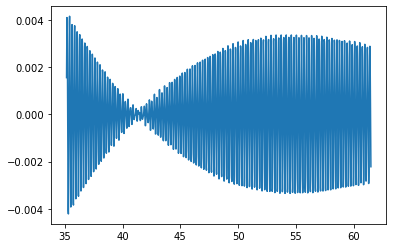

In [5]:
ts = df['Frequency']
plt.plot(ts)

#Check For Stationarity

In [6]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [7]:
print(df.shape)
train=df.iloc[:1000]
#test=df.iloc[-500:]
test=df.iloc[1000:1500]
print(test)
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1500, 1)
           Frequency
Timestamp           
52.725040  -0.002878
52.742622  -0.003267
52.760201  -0.002853
52.777782  -0.001720
52.795364  -0.000139
...              ...
61.427570   0.002554
61.445152   0.001598
61.462734   0.000264
61.480316  -0.001120
61.497894  -0.002221

[500 rows x 1 columns]
(1000, 1) (500, 1)
Frequency   -0.002878
Name: 52.72504044, dtype: float64 Frequency   -0.002221
Name: 61.49789429, dtype: float64


In [8]:
adf_test(df['Frequency'])

1. ADF :  -30.59526394395877
2. P-Value :  0.0
3. Num Of Lags :  24
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1475
5. Critical Values :
	 1% :  -3.434791163965702
	 5% :  -2.8635014840083945
	 10% :  -2.5678142741740877


#Figure Out Order for ARIMA Model

In [9]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
stepwise_fit = auto_arima(train['Frequency'], trace = True,
                          suppress_warnings=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-18627.485, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-9963.503, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-11418.140, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-9965.444, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-11414.041, Time=0.41 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-19577.230, Time=0.96 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-11416.037, Time=0.32 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-17950.534, Time=1.44 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-19394.918, Time=0.49 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-19275.785, Time=0.57 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 6.559 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(2, 0, 1)   Log Likelihood                9793.615
Date:                Mon, 25 Oct 2021   AIC                         -19577.230
Time:                        05:34:56   BIC                         -19552.691
Sample:                             0   HQIC                        -19567.904
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.543e-07   7.16e-07     -0.635      0.526   -1.86e-06    9.49e-07
ar.L1          1.7497      0.000   3551.531      0.000       1.749       1.751
ar.L2         -0.9979      0.000  -6920.198      0.000      -0.998      -0.998
ma.L1          0.7288   1.29e-06   5.64e+05      0.000       0.729       0.729
sigma2      1.727e-10      7e-11      2.468      0.014    3.55e-11     3.1e-10
===================================================================================
Ljung-Box (L1) (Q):                 525.44   Jarque-Bera (JB):                 3.64
Prob(Q):                              0.00   Prob(JB):                         0.16
Heteroskedasticity (H):               0.63   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.54e+21. Standard errors may be unstable.
"""

## Train the Model

In [11]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Frequency'],order=(2,0,1))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Frequency   No. Observations:                 1000
Model:                 ARIMA(2, 0, 1)   Log Likelihood                9788.946
Date:                Mon, 25 Oct 2021   AIC                         -19567.893
Time:                        05:35:06   BIC                         -19543.354
Sample:                             0   HQIC                        -19558.566
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.138e-05   2.79e-06      4.075      0.000    5.91e-06    1.69e-05
ar.L1          1.7498      0.000   3672.807      0.000       1.749       1.751
ar.L2         -0.9979      0.000  -7128.121      0.000      -0.998      -0.998
ma.L1          0.7348   1.24e-06   5.93e+05      0.000       0.735       0.735
sigma2      1.664e-10   7.02e-11      2.372      0.018    2.89e-11    3.04e-10
===================================================================================
Ljung-Box (L1) (Q):                 524.82   Jarque-Bera (JB):                 4.95
Prob(Q):                              0.00   Prob(JB):                         0.08
Heteroskedasticity (H):               0.64   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.01e+21. Standard errors may be unstable.
"""

#Make Predictions on Test Set

1000   -0.002859
1001   -0.003208
1002   -0.002757
1003   -0.001621
1004   -0.000082
          ...   
1495    0.001503
1496    0.000734
1497   -0.000212
1498   -0.001102
1499   -0.001713
Name: ARIMA predictions, Length: 500, dtype: float64


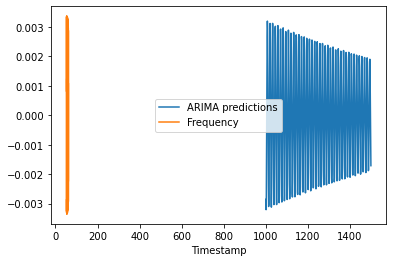

In [12]:
start=len(train)
end=len(train)+len(test)-1

pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')

pred.plot(legend=True)
test['Frequency'].plot(legend=True)
print(pred)


In [13]:
test['Frequency'].mean()

-4.079312766599979e-06

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Frequency']))
print(rmse)


0.0005815434958619258


#To predict for next 30 observations

In [15]:

pred=model.predict(start=len(train),end=len(train)+30).rename('ARIMA Predictions')
#print(len(train))
print(pred)
#print(pred.to_string(index=False))

1000   -0.002859
1001   -0.003208
1002   -0.002757
1003   -0.001621
1004   -0.000082
1005    0.001477
1006    0.002669
1007    0.003199
1008    0.002937
1009    0.001949
1010    0.000483
1011   -0.001098
1012   -0.002400
1013   -0.003101
1014   -0.003028
1015   -0.002201
1016   -0.000827
1017    0.000752
1018    0.002144
1019    0.003004
1020    0.003120
1021    0.002463
1022    0.001200
1023   -0.000356
1024   -0.001817
1025   -0.002821
1026   -0.003121
1027   -0.002642
1028   -0.001506
1029    0.000004
1030    0.001513
Name: ARIMA Predictions, dtype: float64


In [16]:
df1=pd.read_csv('/Users/shravankumarakula/Documents/pythonWorkspace/Time Signals/transmitted.csv',parse_dates=['Timestamp'], 
  index_col="Timestamp", skiprows=range(1,3000), nrows=30)
df1=df1.dropna()
print('Shape of data',df1.shape)
print(df1)

Shape of data (30, 1)
           Frequency
Timestamp           
52.725040  -0.002878
52.742622  -0.003267
52.760201  -0.002853
52.777782  -0.001720
52.795364  -0.000139
52.812942   0.001498
52.830524   0.002771
52.848106   0.003349
52.865688   0.003076
52.883266   0.002020
52.900848   0.000455
52.918430  -0.001215
52.936008  -0.002567
52.953590  -0.003264
52.971172  -0.003143
52.988754  -0.002249
53.006332  -0.000815
53.023914   0.000804
53.041496   0.002215
53.059078   0.003084
53.076656   0.003204
53.094238   0.002548
53.111820   0.001268
53.129398  -0.000331
53.146980  -0.001864
53.164562  -0.002953
53.182144  -0.003319
53.199722  -0.002859
53.217304  -0.001676
53.234886  -0.000060


In [17]:
print(df.to_string(index=False))

 Frequency
  0.001559
  0.003213
  0.004103
  0.004011
  0.002943
  0.001139
 -0.000973
 -0.002867
 -0.004057
 -0.004221
 -0.003307
 -0.001544
  0.000605
  0.002580
  0.003870
  0.004159
  0.003399
  0.001812
 -0.000180
 -0.002078
 -0.003429
 -0.003928
 -0.003482
 -0.002212
 -0.000428
  0.001453
  0.002986
  0.003803
  0.003698
  0.002681
  0.000986
 -0.000972
 -0.002699
 -0.003749
 -0.003846
 -0.002961
 -0.001328
  0.000626
  0.002394
  0.003528
  0.003757
  0.003051
  0.001611
 -0.000188
 -0.001903
 -0.003126
 -0.003581
 -0.003173
 -0.002010
 -0.000369
  0.001360
  0.002764
  0.003499
  0.003376
  0.002413
  0.000839
 -0.000954
 -0.002510
 -0.003428
 -0.003472
 -0.002635
 -0.001140
  0.000620
  0.002195
  0.003191
  0.003378
  0.002732
  0.001433
 -0.000187
 -0.001733
 -0.002839
 -0.003250
 -0.002877
 -0.001811
 -0.000308
  0.001271
  0.002543
  0.003193
  0.003050
  0.002145
  0.000700
 -0.000921
 -0.002304
 -0.003097
 -0.003102
 -0.002327
 -0.000980
  0.000589
  0.001984
  0.002863

In [20]:
print(pred.head(), df1.head())
#print(pred, df1)

1000   -0.002859
1001   -0.003208
1002   -0.002757
1003   -0.001621
1004   -0.000082
Name: ARIMA Predictions, dtype: float64            Frequency
Timestamp           
52.725040  -0.002878
52.742622  -0.003267
52.760201  -0.002853
52.777782  -0.001720
52.795364  -0.000139


<AxesSubplot:>

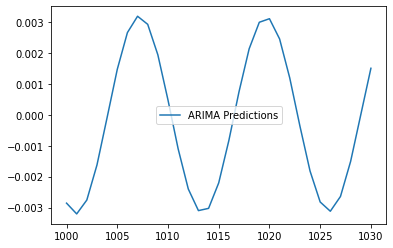

In [21]:
pred.plot(legend=True)


<AxesSubplot:xlabel='Timestamp'>

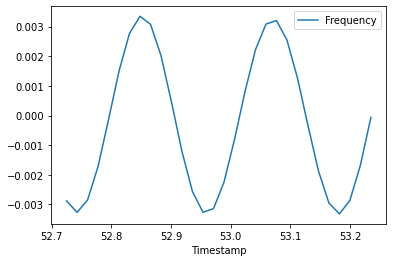

In [22]:
df1.plot(legend=True)